# Dados da mega sena

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import normaltest

In [30]:
df = pd.read_csv('data.csv')
df['concurso'] = df['info_concurso'].apply(lambda x: int(x.split(' ')[1]))
df['data'] = df['info_concurso'].apply(lambda x: x.split('(')[1][:-1])

In [31]:
print('Concursos:', df.shape[0])
print(df.iloc[-1]['data'], '- concurso', df.iloc[-1]['concurso'])
print(df.iloc[0]['data'], '- concurso', df.iloc[0]['concurso'])
df.head()

Concursos: 2670
11/03/1996 - concurso 1
31/12/2023 - concurso 2670


,n1,n2,n3,n4,n5,n6,info_concurso,concurso,data
0,21,24,33,41,48,56,Concurso 2670 (31/12/2023),2670,31/12/2023
1,4,7,16,35,46,54,Concurso 2669 (16/12/2023),2669,16/12/2023
2,1,27,30,41,46,57,Concurso 2668 (14/12/2023),2668,14/12/2023
3,1,4,8,21,46,51,Concurso 2667 (12/12/2023),2667,12/12/2023
4,5,25,29,30,43,47,Concurso 2666 (09/12/2023),2666,09/12/2023


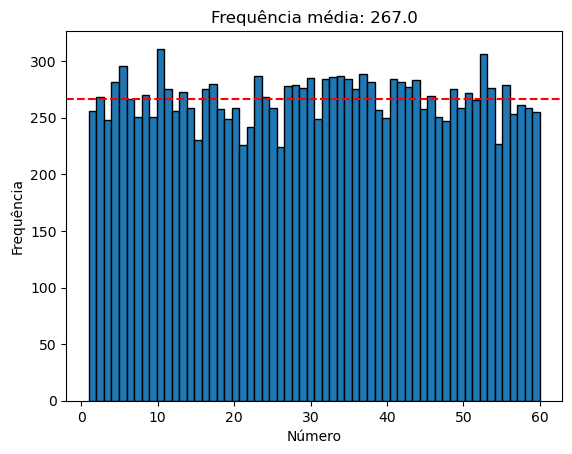

In [32]:
x = df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6']].to_numpy(copy=True).ravel()

hist, bin_edges, _ = plt.hist(
    x,
    bins=60,
    edgecolor='k',
)
avg_count = hist.mean()
plt.axhline(avg_count, c='r', ls='--')
plt.title(f'Frequência média: {avg_count}')
plt.xlabel('Número')
plt.ylabel('Frequência');

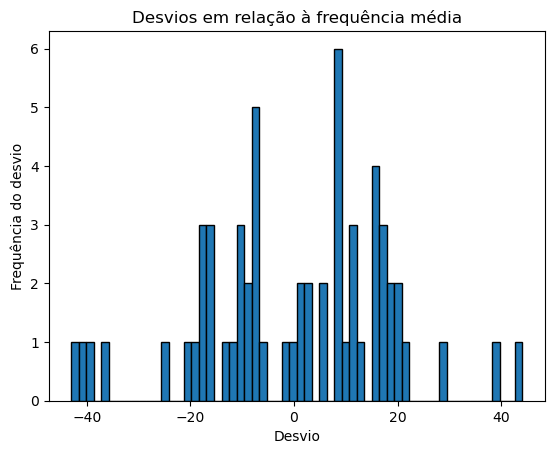

In [33]:
res = pd.DataFrame({'num': list(range(1, 61)), 'count': hist})
res['err'] = res['count']-avg_count

_ = plt.hist(res['err'], bins=60, edgecolor='k')
plt.xlabel('Desvio')
plt.ylabel('Frequência do desvio')
plt.title('Desvios em relação à frequência média');

In [44]:
confidence_level = 0.99
alpha = 1-confidence_level

In [45]:
# Hipótese nula: a amostra vem de uma distribuição normal
statistic, pvalue = normaltest(res['err'])
print(f'p-valor: {pvalue}')

if pvalue <= alpha:
    print('Rejeitar hipótese nula.')
else:
    print('Falha em rejeitar hipótese nula.')

p-valor: 0.6629329325764811
Falha em rejeitar hipótese nula.


# Dados simulados

## Sorteio justo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import normaltest

In [2]:
np.random.seed(0)
concursos = 2670
dados = []
space = list(range(1, 61))
for c in range(concursos):
    dezenas = np.random.choice(space, size=6, replace=False)
    dezenas.sort()
    dados.append(dezenas)

In [3]:
df_simul = pd.DataFrame(dados)
df_simul.columns = [ f'n{i}' for i in range(1, len(df_simul.columns)+1) ]

In [4]:
print('Concursos:', df_simul.shape[0])
df_simul.head()

Concursos: 2670


,n1,n2,n3,n4,n5,n6
0,3,12,27,29,36,60
1,8,11,24,27,49,59
2,6,8,29,30,39,45
3,10,15,21,24,31,39
4,7,14,26,29,48,57


In [5]:
x = df_simul[['n1', 'n2', 'n3', 'n4', 'n5', 'n6']].to_numpy(copy=True).ravel()

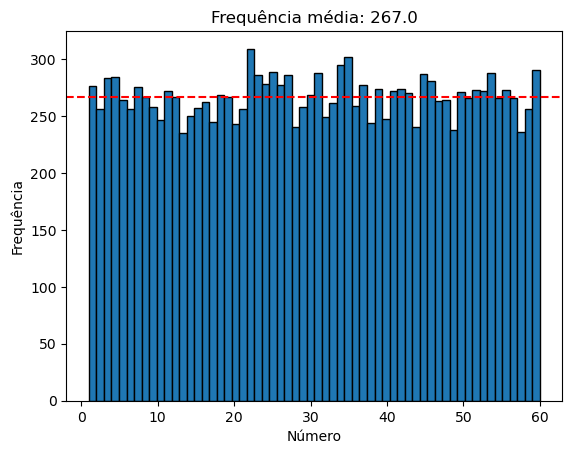

In [7]:
hist, bin_edges, _ = plt.hist(
    x,
    bins=60,
    edgecolor='k',
)
avg_count = hist.mean()
plt.axhline(avg_count, c='r', ls='--')
plt.title(f'Frequência média: {avg_count}')
plt.xlabel('Número')
plt.ylabel('Frequência');

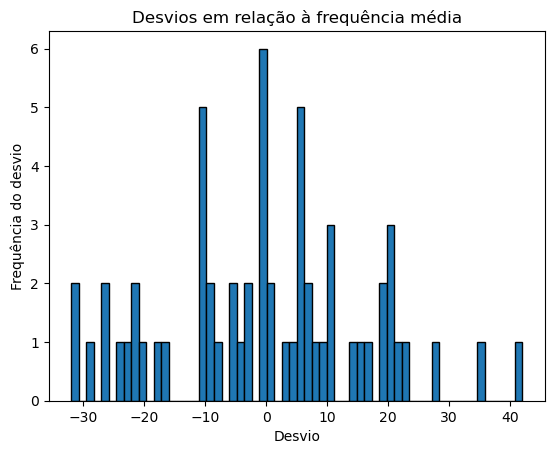

In [8]:
res = pd.DataFrame({'num': list(range(1, 61)), 'count': hist})
res['err'] = res['count']-avg_count

_ = plt.hist(res['err'], bins=60, edgecolor='k')
plt.xlabel('Desvio')
plt.ylabel('Frequência do desvio')
plt.title('Desvios em relação à frequência média');

In [9]:
confidence_level = 0.95
alpha = 1-confidence_level

In [10]:
# Hipótese nula: a amostra vem de uma distribuição normal
statistic, pvalue = normaltest(res['err'])
print(f'p-valor: {pvalue}')

if pvalue <= alpha:
    print('Rejeitar hipótese nula.')
else:
    print('Falha em rejeitar hipótese nula.')

p-valor: 0.9148837155371948
Falha em rejeitar hipótese nula.


## Sorteio viciado

In [66]:
x = df_simul[['n1', 'n2', 'n3', 'n4', 'n5', 'n6']].to_numpy(copy=True).ravel()

# Substituição - sorteio viciado
np.random.seed(0)
p = 0.002# percentual de números substituídos
mask = np.random.choice([True, False], size=x.size, p=[p, 1-p])
x[mask] = 60

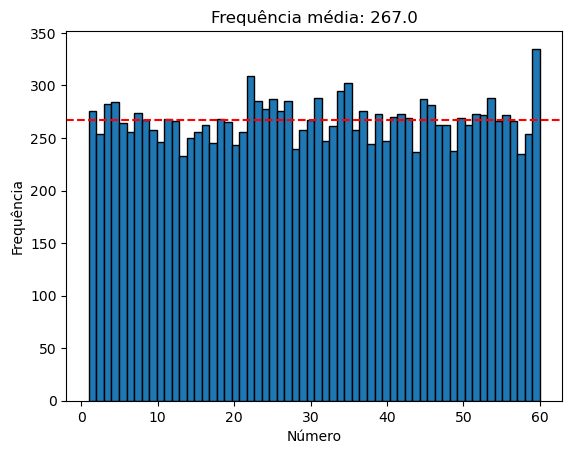

In [67]:
hist, bin_edges, _ = plt.hist(
    x,
    bins=60,
    edgecolor='k',
)
avg_count = hist.mean()
plt.axhline(avg_count, c='r', ls='--')
plt.title(f'Frequência média: {avg_count}')
plt.xlabel('Número')
plt.ylabel('Frequência');

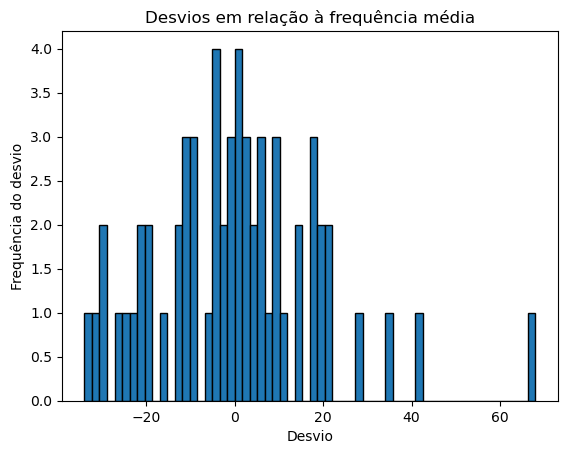

In [68]:
res = pd.DataFrame({'num': list(range(1, 61)), 'count': hist})
res['err'] = res['count']-avg_count

_ = plt.hist(res['err'], bins=60, edgecolor='k')
plt.xlabel('Desvio')
plt.ylabel('Frequência do desvio')
plt.title('Desvios em relação à frequência média');

In [73]:
confidence_level = 0.95
alpha = 1-confidence_level

In [74]:
# Hipótese nula: a amostra vem de uma distribuição normal
statistic, pvalue = normaltest(res['err'])
print(f'p-valor: {pvalue}')

if pvalue <= alpha:
    print('Rejeitar hipótese nula.')
else:
    print('Falha em rejeitar hipótese nula.')

p-valor: 0.004429697634395639
Rejeitar hipótese nula.
